<a href="https://colab.research.google.com/github/saleh1312/python/blob/master/remove%20rise%20from%20sin%20wave%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img= np.zeros((500,500))
#y=a*sin(2*pi*f*t)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    img[y,x] = 255*( np.sin(    np.pi * 8 * (1/img.shape[1])  *  (x+10) ) )

In [ ]:
img=np.abs(img).astype(np.uint8)

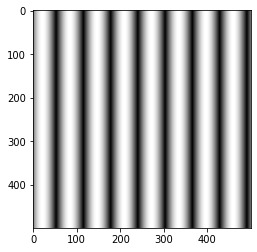

In [ ]:
plt.imshow(img,'gray')

In [ ]:
ic = cv2.imread('sisnsu.png',0)
ic=cv2.resize(ic,(500,500))

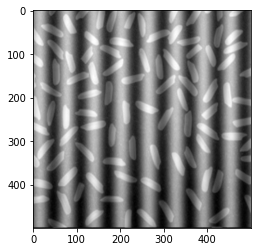

In [221]:
plt.imshow(ic,'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


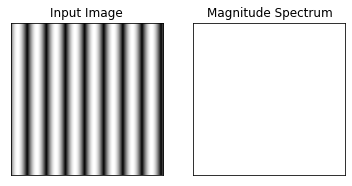

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
m = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(m, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

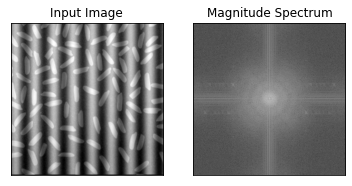

In [ ]:
f2 = np.fft.fft2(ic)
fshift2 = np.fft.fftshift(f2)
m2 = 20*np.log(np.abs(fshift2))
plt.subplot(121),plt.imshow(ic, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(m2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

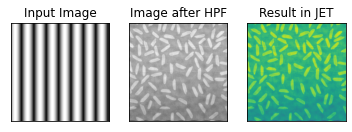

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift2[fshift!=0] = 0
f_ishift2 = np.fft.ifftshift(fshift2)
img_back = np.fft.ifft2(f_ishift2)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [226]:
res=np.zeros(img_back.shape)

In [229]:
res=cv2.normalize(img_back,res,alpha=0,beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

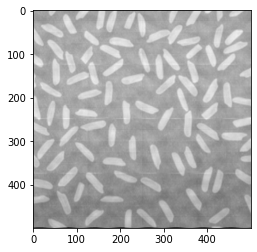

In [230]:
plt.imshow(res,'gray')

In [271]:
res2=cv2.adaptiveThreshold(res,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,61,-10)

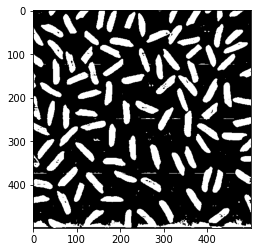

In [272]:
plt.imshow(res2,'gray')